In [1]:
import pandas as pd
import osmnx as ox


In [2]:
Gmpa_KAIST = ox.load_graphml('Final_KAIST.graphml')

In [3]:
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)

In [4]:
gdf_nodes

,y,x,street_count,highway,geometry
osmid,,,,,
1,36.373472,127.365424,3,NaN,POINT (127.36542 36.37347)
2,36.374502,127.363504,3,NaN,POINT (127.36350 36.37450)
3,36.374487,127.361030,3,NaN,POINT (127.36103 36.37449)
4,36.374498,127.359831,3,NaN,POINT (127.35983 36.37450)
5,36.374210,127.359494,3,NaN,POINT (127.35949 36.37421)
...,...,...,...,...,...
240,36.370737,127.367833,3,NaN,POINT (127.36783 36.37074)
241,36.375111,127.361105,3,NaN,POINT (127.36110 36.37511)
242,36.370736,127.360491,3,NaN,POINT (127.36049 36.37074)


In [ ]:
# 창의관 번호

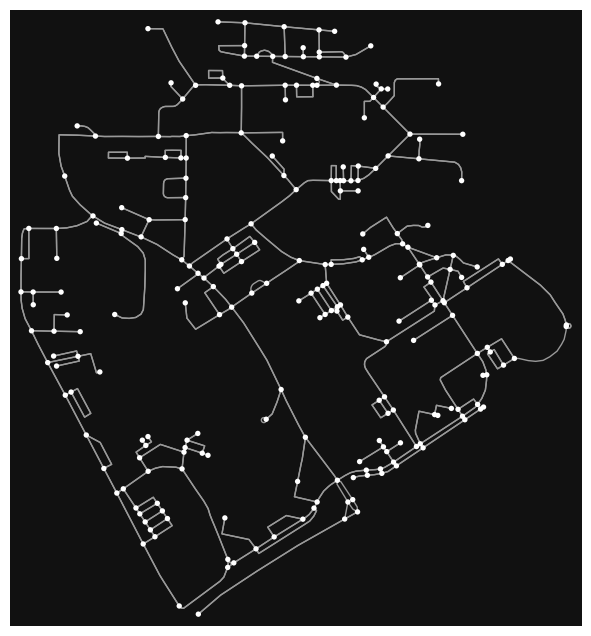

In [6]:
fig,ax = ox.plot_graph(Gmpa_KAIST)

In [16]:
import matplotlib.pyplot as plt

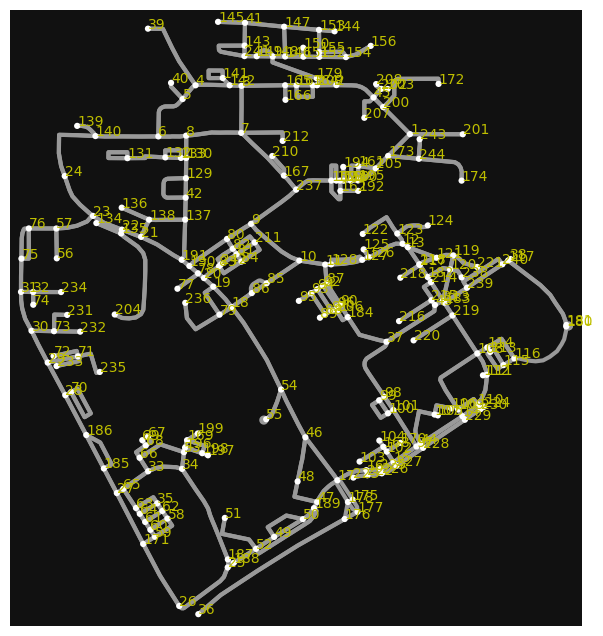

In [17]:
fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in range(len(node)):
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()


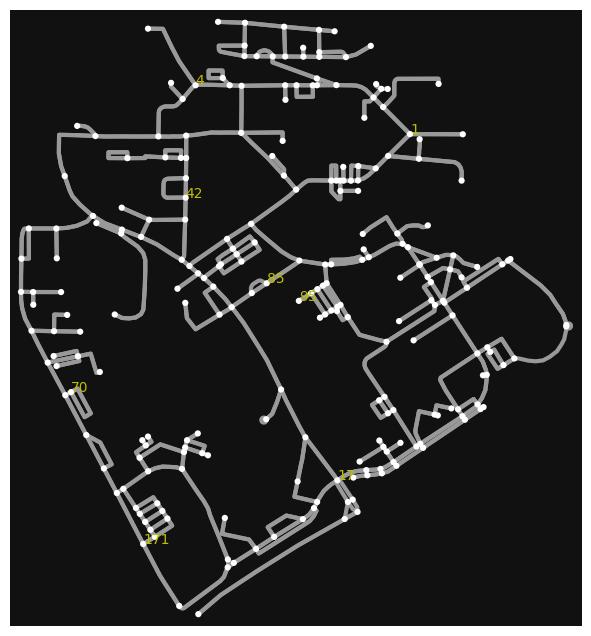

In [19]:
'''
2. Station 지정해주기 <- special node일 뿐
일단 8개로 결정. 창의관, 기계동, 정문, N1, 희망관, 쪽문, 신뢰관, 도서관
Station : staion들의 정보를 모아둔 것.
'''
'''
창의관(85), 기계공학동(42), 정문(17), N1(1), 희망관(70), 쪽문(171), 신뢰관(4) - 기혼자숙소앞으로 변경
도서관(95)

'''
fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in [84,41,16,0,69,170,3,94]:
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()


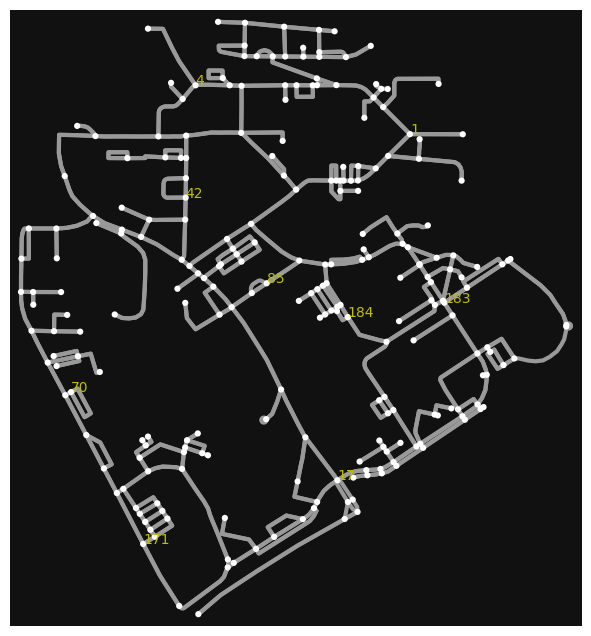

In [21]:
'''
동측 하나가 부족한거같아서 183 추가
도서관(95) 가 좀 애매해서, 자연과학동으로 변경 184
'''

fig, ax = ox.plot_graph(Gmpa_KAIST, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
for i in [84,41,16,0,69,170,3,182,183]: # 참고로 id 랑 index 랑 1 차이남
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()

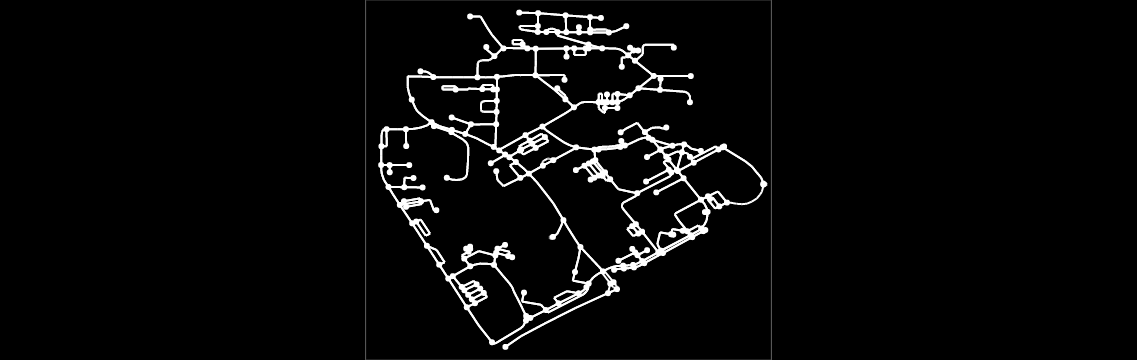

In [34]:
Gmpa_KAIST = ox.load_graphml('../Main/Final_KAIST.graphml')
gdf_nodes,gdf_edges = ox.graph_to_gdfs(Gmpa_KAIST)
fig = go.Figure(data=go.Scattergeo(
    lon=gdf_nodes['x'],
    lat=gdf_nodes['y'],
    mode='markers',
    marker_color='rgb(255, 255, 255)',
))

for edgeidx in range(len(gdf_edges)):
    linestrings = gdf_edges['geometry'].iloc[edgeidx]
    x, y = linestrings.xy
    lats_data = y
    lons_data = x

    for i in range(len(lats_data) - 1):
        fig.add_trace(go.Scattergeo(lon=[lons_data[i], lons_data[i + 1]], lat=[lats_data[i], lats_data[i + 1]],
                                    mode='lines', line=dict(width=2, color='white'), ))


fig.update_geos(lataxis_range=[36.3619, 36.3773], lonaxis_range=[127.3537, 127.3708])
fig.update_layout(showlegend=False, margin ={'t':0, 'r':0, 'b':0, 'l':0 }, plot_bgcolor = 'black', paper_bgcolor = 'black', geo = dict(landcolor = 'black'))


In [38]:
# station plot
newfig = copy.deepcopy(fig)
node, edge = ox.graph_to_gdfs(Gmpa_KAIST)

array([36.3703384, 36.3721381, 36.3662001, 36.3734724, 36.3680536,
       36.3648624, 36.3744978, 36.3699306, 36.3696281])

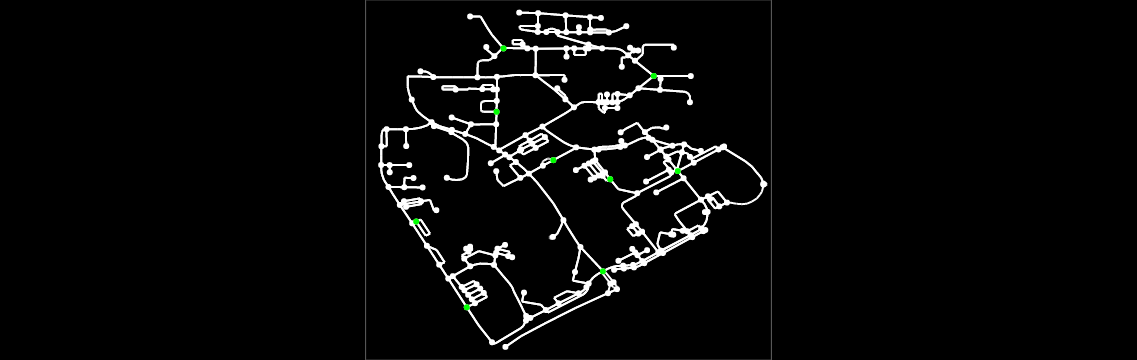

In [44]:
# station plot
newfig = copy.deepcopy(fig)
node, edge = ox.graph_to_gdfs(Gmpa_KAIST)
lon_data = node['x'].values[[84,41,16,0,69,170,3,182,183]]
lat_data = node['y'].values[[84,41,16,0,69,170,3,182,183]]
    
newfig.add_trace(go.Scattergeo(lon=lon_data,lat=lat_data,mode='markers',marker_color='rgb(0, 255, 0)'))


    

In [35]:
# req 

In [26]:
df_req = pd.read_csv('request_data.csv')
df_req

,Unnamed: 0,Time,startedge,startpart,endedge,endpart
0,0,2022-11-30 00:38:18,346,0.1,55,0.5
1,1,2022-11-30 01:14:49,288,0.6,439,0.1
2,2,2022-11-30 04:06:03,542,0.9,371,1.0
3,3,2022-11-30 06:47:06,145,0.7,269,0.5
4,4,2022-11-30 06:52:44,52,0.4,200,0.9
5,5,2022-11-30 08:48:43,43,0.8,168,0.5
6,6,2022-11-30 12:33:01,585,0.1,607,0.0
7,7,2022-11-30 19:31:45,91,0.8,135,0.8
8,8,2022-11-30 20:06:59,249,0.0,22,0.3
9,9,2022-11-30 20:34:15,279,0.8,283,0.2


In [29]:
from geopy import distance

In [30]:
def find_p_star(target_edge,part):
    A = list(target_edge.geometry.coords)
    all_length = target_edge.length
    length = all_length*part

    summ = 0
    for p_point_idx, p_point in enumerate(A):
        if p_point_idx == 0:
            p1 = [p_point[1],p_point[0]]
            continue

        p2 = [p_point[1],p_point[0]]
        dist = distance.distance(p1,p2).km * 1000
        oldsum = summ
        summ += dist
        if summ > length:
            break
        p1 = p2

    # sum-oldsum : p1 ~ p2 거리
    # p* 원하는 위치
    # (length-oldsum) : p1 ~ p* 거리
    ratio = (length-oldsum) / (summ-oldsum) # 비율
    p_star = [ratio*(ai-bi)+bi for ai,bi in zip(p2,p1)]
    return p_star

In [31]:
p_star_list = []
for req_idx in range(len(df_req)):
    target_edge = gdf_edges.iloc[df_req.iloc[req_idx].startedge]
    part = df_req.iloc[req_idx].startpart

    p_star = find_p_star(target_edge,part)
    p_star_list.append(p_star)

p_star_list
    

[[36.37089308682907, 127.36411698634313],
 [36.36757369871047, 127.36609956446719],
 [36.36961022971727, 127.36376495658034],
 [36.36553523658176, 127.36284505240711],
 [36.36601026908734, 127.3636027268423],
 [36.36766201381028, 127.36670044068616],
 [36.36648430247394, 127.36503420238095],
 [36.369986720293355, 127.35527844619017],
 [36.3698847, 127.3636102],
 [36.36766196772487, 127.36496189971491]]

In [32]:
import copy

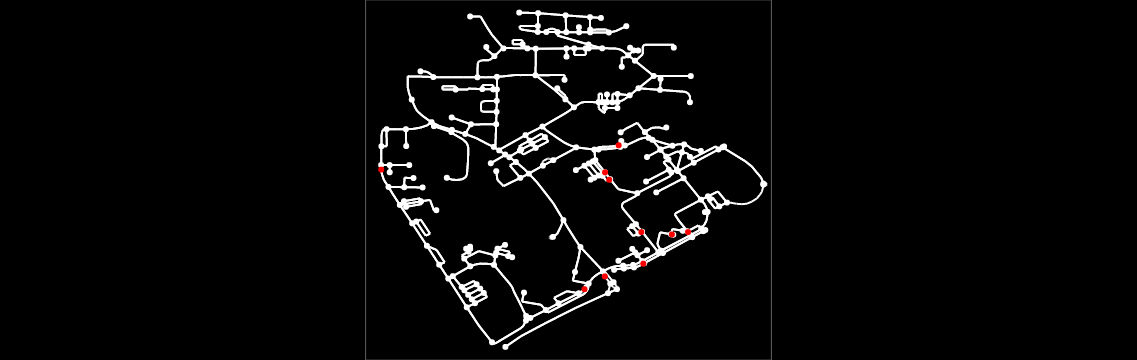

In [37]:
# request plot
newfig = copy.deepcopy(fig)
newfig.add_trace(go.Scattergeo(lon=[item[1] for item in p_star_list],lat=[item[0] for item in p_star_list],mode='markers',marker_color='rgb(255, 0, 0)'))
